# Paper Code Overview

## Installation 

Cloned with "`git clone https://github.com/MuhammedHasan/metabolitics.git`"

Download dependencies with "`pip install -r requirements.txt`"

This notebook is avaliable at "`src/notebooks/paper_overview.ipynb`"

Run notebook with "`jupyter notebook`" and run all cells results of paper will be reproduced

Note: Some computation step precomputed and loaded due to reduce expensive computation steps but there are still some steps may require relatively high memory and computation power.

## Data Preprocessing

Imports and basic configurations

In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [40]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

Loading pre-computed reaction fluxes since this is expensive computation 

In [3]:
from services import DataReader

X, y = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

Convertion of reaction level flux informations to pathway level diff scores 

In [4]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pathways = pre.fit_transform(X, y)

pre = DynamicPreprocessing(['flux-diff', 'feature-selection', 'pathway-scoring', 'transport-elimination'])
X_fs_pathways = pre.fit_transform(X, y)

`"flux-diff"` converts min-max values to diff score based on methods explained in the paper.

`"feature-selection"` feature selection select significant reactions. Thus, it is decrease number of pathway and this version used during in this paper. But unselected-version also provides to show diff-score for all pathways.  

`"pathway-scoring"` converts reaction diff scores into pathway diff scores

`"transport-elimination"` eliminates transport pathway in final dataset.

## Significant Pathways

Elimation of low variance feature for ANOVA since zero variance features cause computatinal problems. And convertion to pandas DataFrame.

In [5]:
from services.data_utils import variance_threshold_on_df

df_pathways = variance_threshold_on_df(pd.DataFrame(X_pathways), threshold=0.1)

df_fs_pathways = pd.DataFrame(X_fs_pathways)

ANOVA computation

In [6]:
from sklearn.feature_selection import f_classif

F, pvals = f_classif(df_pathways.values, y)
F_fs, pvals_fs = f_classif(df_fs_pathways.values, y)

Correction of p-values with multiple hypothesis testing

In [7]:
from statsmodels.sandbox.stats.multicomp import multipletests

_, corrected_pvals, _, _ = multipletests(pvals, alpha=0.1, method='fdr_bh')
_, corrected_pvals_fs, _, _ = multipletests(pvals_fs, alpha=0.1, method='fdr_bh')

P and F values added to DataFrame

In [8]:
df_pathways['labels'] = y
df_fs_pathways['labels'] = y

df_pathways_mean = df_pathways.groupby('labels').mean().T
df_fs_pathways_mean = df_fs_pathways.groupby('labels').mean().T

df_pathways_mean['F'] = F
df_pathways_mean['pval'] = corrected_pvals

df_fs_pathways_mean['F'] = F_fs
df_fs_pathways_mean['pval'] = corrected_pvals_fs

In [9]:
sort_by = 'pval'

In [10]:
df_pathways_mean.sort_values(sort_by, ascending=True).round(5)

labels,bc,h,F,pval
CoA catabolism_dif,500.54786,-0.0,107.31630,0.00000
Taurine and hypotaurine metabolism_dif,842.20688,0.0,92.01384,0.00000
Methionine and cysteine metabolism_dif,127.97986,0.0,76.70192,0.00000
Butanoate metabolism_dif,-360.22080,-0.0,71.11305,0.00000
Eicosanoid metabolism_dif,-10.28265,0.0,49.85710,0.00000
Glutamate metabolism_dif,-257.84446,0.0,45.65563,0.00000
Glycerophospholipid metabolism_dif,-58.80813,0.0,38.65053,0.00000
Aminosugar metabolism_dif,-74.58525,0.0,37.58126,0.00000
Arginine and Proline Metabolism_dif,127.96223,-0.0,36.06250,0.00000
Sphingolipid metabolism_dif,-29.64928,-0.0,30.15818,0.00000


In [ ]:
(df_pathways_mean.sort_values(sort_by, ascending=True)
     .applymap(lambda x: '%.1g' % x).to_csv('notebooks/significant_pathways.csv'))

In [11]:
df_fs_pathways_mean.sort_values(sort_by, ascending=True)

labels,bc,h,F,pval
Alanine and aspartate metabolism_dif,1959.431868,2.213902e-13,204.015024,1.007101e-31
Arginine and Proline Metabolism_dif,1258.534014,-4.487638e-14,156.456557,2.095563e-26
Methionine and cysteine metabolism_dif,2714.748575,-1.406127e-13,134.216382,1.073107e-23
CoA catabolism_dif,1709.001255,-1.899767e-13,132.887468,1.213501e-23
Taurine and hypotaurine metabolism_dif,1461.021229,-5.983518e-15,127.609122,5.040205e-23
Fatty acid oxidation_dif,-1609.457031,1.705303e-13,120.842465,3.606214e-22
Nucleotide interconversion_dif,1978.421496,1.077033e-13,115.261959,1.883275e-21
Glutathione metabolism_dif,-826.486649,-6.432282e-14,113.081956,3.366898e-21
Vitamin C metabolism_dif,-178.300931,-8.040352e-14,95.022083,1.355263e-18
Eicosanoid metabolism_dif,-1101.419878,1.106951e-13,79.706175,2.784093e-16


## Heatmaps

In [12]:
from visualization import HeatmapVisualization

top_10_pathways = df_fs_pathways_mean.sort_values(sort_by, ascending=True)[:10].index

heat = HeatmapVisualization(list(df_fs_pathways[top_10_pathways].T.to_dict().values()), y).iplot_heatmap()

## Significant Pathways For Stages

Reads stage labels

In [13]:
_, y_stages = DataReader().read_data('BC', True)

Shows stage statistics

1    19
2    50
3    49
4    20
h    76
dtype: int64


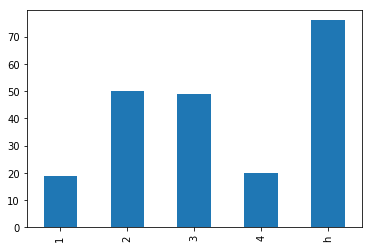

In [14]:
from itertools import groupby

freqs = pd.Series({key:len(list(group)) for key, group in groupby(np.sort(y_stages))}) 

print(freqs)

freqs.plot(kind='bar')

Healthy samples eliminated in stage study

In [15]:
X_pathways_without_h, y_stages_without_h = list(zip(*filter(lambda x: x[1] !='h', zip(X_pathways, y_stages))))

In [16]:
df_pathways_without_h = variance_threshold_on_df(pd.DataFrame.from_records(X_pathways_without_h), threshold=0.1)

ANOVA calculation for different stages

In [17]:
F_stages, pvals_stages = f_classif(df_pathways_without_h.loc[:, df_pathways_without_h.columns != 'labels'].values, y_stages_without_h)

Correction of p-values with multiple hypothesis testing

In [18]:
_, corrected_pvals_stages, _, _ = multipletests(pvals_stages, alpha=0.1, method='fdr_bh')

In [19]:
df_pathways_without_h['labels'] = y_stages_without_h

df_pathways_stage_mean = df_pathways_without_h.groupby('labels').mean().T

df_pathways_stage_mean['F'] = F_stages
df_pathways_stage_mean['pval'] = corrected_pvals_stages

In [20]:
df_pathways_stage_mean.sort_values(sort_by, ascending=True)

labels,1,2,3,4,F,pval
Folate metabolism_dif,27.027481,-28.609793,-21.337823,-0.360303,5.398040,0.106599
Lysine metabolism_dif,-113.327086,-13.273605,174.892632,144.682014,4.085363,0.188845
Fatty acid synthesis_dif,17.000588,1.772351,3.920585,28.368684,4.264346,0.188845
Biotin metabolism_dif,-346.274903,119.816908,12.285768,-161.017253,3.708048,0.229493
Purine synthesis_dif,-145.905419,-329.063686,-269.675587,-361.546007,3.069065,0.259890
"Glycine, serine, alanine and threonine metabolism_dif",10.460088,-114.497030,-135.804395,-68.178201,3.239513,0.259890
Triacylglycerol synthesis_dif,87.854230,5.257690,13.035967,75.319148,3.100598,0.259890
Urea cycle_dif,27.279951,-35.907602,-44.385863,-64.280186,3.277765,0.259890
beta-Alanine metabolism_dif,-84.363090,-7.633303,44.896198,-74.145525,2.594617,0.423103
Butanoate metabolism_dif,-302.590954,-379.656041,-383.198936,-310.084602,2.436854,0.446975


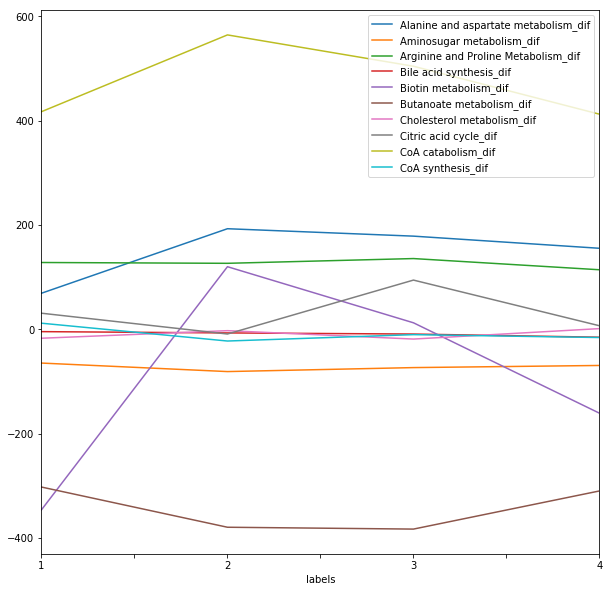

In [21]:
df_pathways_stage_mean[:10][['1','2','3','4']].T.plot(kind='line', figsize=(10, 10))

## Pathifier Results

Loads patifier results which obtain according to our metabolite pathway mapping

In [22]:
from services import DataReader

X_pathifier, y = DataReader().read_analyze_solution('bc_pathifier_analysis#k=0')

Pathway by their pathier scores

In [23]:
pd.DataFrame.from_records(X_pathifier).mean().sort_values(ascending=False)

N-glycan degradation                                 0.874211
Keratan sulfate degradation                          0.874211
Valine, leucine, and isoleucine metabolism           0.849739
Urea cycle                                           0.802273
Citric acid cycle                                    0.747137
Alanine and aspartate metabolism                     0.700397
Vitamin C metabolism                                 0.687730
Arginine and Proline Metabolism                      0.617700
Lysine metabolism                                    0.601312
Glyoxylate and dicarboxylate metabolism              0.585649
Methionine and cysteine metabolism                   0.433529
Glycerophospholipid metabolism                       0.343179
Tryptophan metabolism                                0.314679
Tyrosine metabolism                                  0.271014
Sphingolipid metabolism                              0.264335
Eicosanoid metabolism                                0.227695
Miscella

## Paradigm Results

## Measured Metabolite Count For Each Pathway

Load metobolite measurements and map naming

In [24]:
from models import metabolite_extantions
from services import NamingService

X_metabolites = NamingService('recon').to(DataReader().read_data('BC')[0])

Network loaded

In [25]:
recon = DataReader().read_network_model()

metabolite names

In [26]:
from functools import reduce

metabolite_names = set(reduce(list.__add__, [list(m.keys()) for m in X_metabolites]))

In [27]:
from collections import defaultdict

pathways = defaultdict(int)
for m in metabolite_names:
    for p in recon.metabolites.get_by_id(m).connected_subsystems():
        if p:
            pathways[p] += 1

pd.Series(pathways)

Alanine and aspartate metabolism                      7
Alkaloid synthesis                                    1
Aminosugar metabolism                                 1
Arachidonic acid metabolism                           1
Arginine and Proline Metabolism                       8
Bile acid synthesis                                   1
Biotin metabolism                                     1
C5-branched dibasic acid metabolism                   1
Cholesterol metabolism                                2
Citric acid cycle                                     5
D-alanine metabolism                                  1
Eicosanoid metabolism                                 4
Exchange/demand reaction                             26
Fatty acid oxidation                                 15
Fructose and mannose metabolism                       2
Galactose metabolism                                  2
Glutamate metabolism                                  1
Glycerophospholipid metabolism                  

## Classification 

Pathway diff-scores given as input to LogisticRegression with given parameters

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.3e-6, random_state=43))
        ])

10-fold test runned with f1 score calculation

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GroupKFold

kf = StratifiedKFold(n_splits=10, random_state=43)

scores = cross_val_score(pipe, X_fs_pathways, y, cv=kf, n_jobs=-1, scoring='f1_micro')
print('kfold test: %s' % scores)
print('mean: %s' % scores.mean().round(3))
print('std: %s' % scores.std().round(3))

kfold test: [ 0.95454545  0.95454545  0.86363636  0.90909091  0.86363636  0.86363636
  1.          1.          0.9         0.95      ]
mean: 0.926
std: 0.051
